In [ ]:
# Importing necessary libraries
from google.colab import drive
drive.mount('/content/drive')
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data Collection
# import pandas as pd
wine_dataset = pd.read_csv('/content/drive/MyDrive/WineQT.csv')

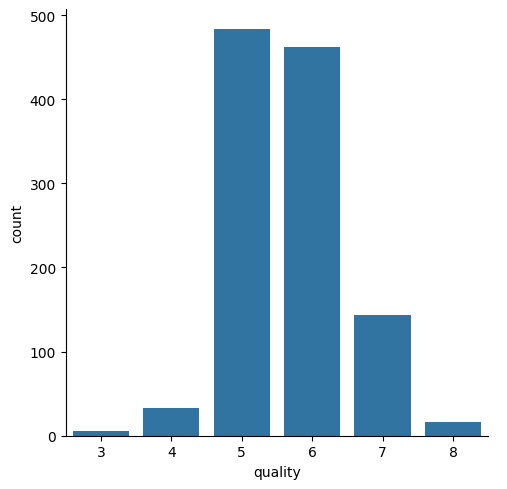

In [ ]:
# Data Analysis & Visualization (QUALITY DISTRIBUTION VISUALIZATION)
wine_dataset.describe()
sns.catplot(x='quality', data=wine_dataset, kind='count')
plt.show()

<Axes: >

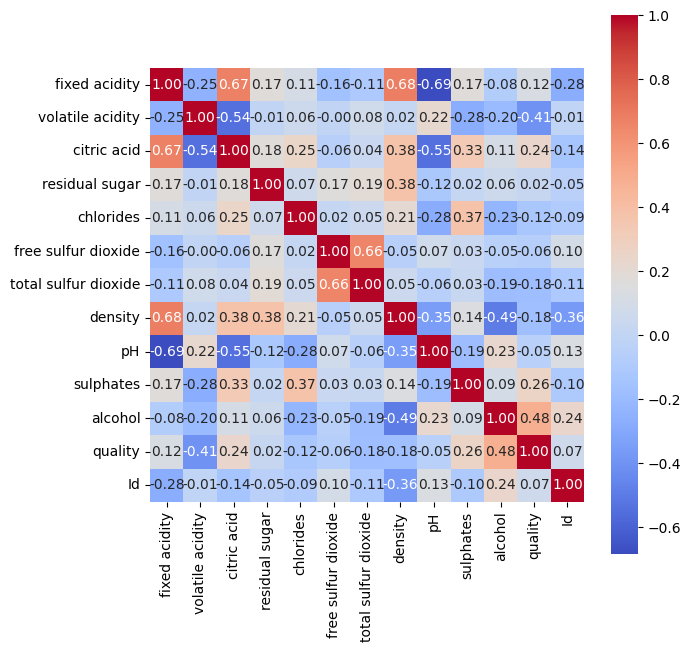

In [ ]:
# Correlation Analysis
correlation = wine_dataset.corr()
plt.figure(figsize=(7,7))
sns.heatmap(correlation, cbar=True, square=True, fmt= '.2f', annot=True, cmap='coolwarm')

In [ ]:
# Data Pre-processing
columns_to_drop = ['quality', 'Id']
X = wine_dataset.drop(columns_to_drop, axis=1)
Y = wine_dataset['quality'].apply(lambda Y: 1 if Y >= 7 else 0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
# Apply Dimensionality Reduction: PCA
pca = PCA(n_components=8)  # Assuming 8 components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
# Apply Dimensionality Reduction: Factor Analysis
fa = FactorAnalysis(n_components=8)  # Assuming 8 components
X_train_fa = fa.fit_transform(X_train)
X_test_fa = fa.transform(X_test)

In [ ]:
# Apply Dimensionality Reduction: PCA and Factor Analysis together
combined_transformer = Pipeline([
    ('pca', PCA(n_components=8)),
    ('fa', FactorAnalysis(n_components=8))
])

# Fit and transform the combined transformer on training data
X_train_combined = combined_transformer.fit_transform(X_train)
X_test_combined = combined_transformer.transform(X_test)

# Then proceed with model training and evaluation for each model

In [ ]:
# Define the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(),
    'MLP': MLPClassifier(max_iter=500)
}

# Evaluate each model using cross-validation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X, Y, cv=5)  # 5-fold cross-validation
    print(f'{model_name} Cross-Validation Accuracy: {cv_scores.mean()}')

# Evaluate each model with PCA using cross-validation
for model_name, model in models.items():
    cv_scores_pca = cross_val_score(model, X_train_pca, Y_train, cv=5)  # 5-fold cross-validation with PCA
    print(f'{model_name} with PCA Cross-Validation Accuracy: {cv_scores_pca.mean()}')

# Evaluate each model with Factor Analysis using cross-validation
for model_name, model in models.items():
    cv_scores_fa = cross_val_score(model, X_train_fa, Y_train, cv=5)  # 5-fold cross-validation with Factor Analysis
    print(f'{model_name} with Factor Analysis Cross-Validation Accuracy: {cv_scores_fa.mean()}')

# Evaluate each model with PCA and FA combined using cross-validation
for model_name, model in models.items():
    cv_scores_combined = cross_val_score(model, X_train_combined, Y_train, cv=5)  # 5-fold cross-validation with PCA and FA combined
    print(f'{model_name} with PCA and FA combined Cross-Validation Accuracy: {cv_scores_combined.mean()}')


Random Forest Cross-Validation Accuracy: 0.8810158584233511
Naive Bayes Cross-Validation Accuracy: 0.8092545774917642
SVM Cross-Validation Accuracy: 0.8608940473454378
MLP Cross-Validation Accuracy: 0.863483490385352
Random Forest with PCA Cross-Validation Accuracy: 0.902636161652555
Naive Bayes with PCA Cross-Validation Accuracy: 0.8708761184171021
SVM with PCA Cross-Validation Accuracy: 0.8599591665165434
MLP with PCA Cross-Validation Accuracy: 0.8665465681859125
Random Forest with Factor Analysis Cross-Validation Accuracy: 0.8993454632798896
Naive Bayes with Factor Analysis Cross-Validation Accuracy: 0.8610400528433315
SVM with Factor Analysis Cross-Validation Accuracy: 0.8621209391701194


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

MLP with Factor Analysis Cross-Validation Accuracy: 0.8862126944094157
Random Forest with PCA and FA combined Cross-Validation Accuracy: 0.8916831802077703
Naive Bayes with PCA and FA combined Cross-Validation Accuracy: 0.8424187834023898
SVM with PCA and FA combined Cross-Validation Accuracy: 0.855563562120939


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP with PCA and FA combined Cross-Validation Accuracy: 0.856668468143878


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Model Training: Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
rf_test_data_accuracy = rf_model.score(X_test, Y_test)
print('Random Forest Accuracy:', rf_test_data_accuracy)

Random Forest Accuracy: 0.9170305676855895


In [ ]:
# Random Forest Classifier with PCA
rf_model_pca = RandomForestClassifier()
rf_model_pca.fit(X_train_pca, Y_train)
rf_pred_pca = rf_model_pca.predict(X_test_pca)
rf_accuracy_pca = accuracy_score(rf_pred_pca, Y_test)
print('Random Forest with PCA Accuracy:', rf_accuracy_pca)

Random Forest with PCA Accuracy: 0.9082969432314411


In [ ]:
# Random Forest Classifier with Factor Analysis
rf_model_fa = RandomForestClassifier()
rf_model_fa.fit(X_train_fa, Y_train)
rf_pred_fa = rf_model_fa.predict(X_test_fa)
rf_accuracy_fa = accuracy_score(rf_pred_fa, Y_test)
print('Random Forest with Factor Analysis Accuracy:', rf_accuracy_fa)

Random Forest with Factor Analysis Accuracy: 0.8951965065502183


In [ ]:
# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
nb_test_data_accuracy = nb_model.score(X_test, Y_test)
print('Naive Bayes Accuracy:', nb_test_data_accuracy)

Naive Bayes Accuracy: 0.834061135371179


In [ ]:
# Naive Bayes Classifier with PCA
nb_model_pca = GaussianNB()
nb_model_pca.fit(X_train_pca, Y_train)
nb_pred_pca = nb_model_pca.predict(X_test_pca)
nb_accuracy_pca = accuracy_score(nb_pred_pca, Y_test)
print('Naive Bayes with PCA Accuracy:', nb_accuracy_pca)

Naive Bayes with PCA Accuracy: 0.8995633187772926


In [ ]:
# Naive Bayes Classifier with Factor Analysis
nb_model_fa = GaussianNB()
nb_model_fa.fit(X_train_fa, Y_train)
nb_pred_fa = nb_model_fa.predict(X_test_fa)
nb_accuracy_fa = accuracy_score(nb_pred_fa, Y_test)
print('Naive Bayes with Factor Analysis Accuracy:', nb_accuracy_fa)

Naive Bayes with Factor Analysis Accuracy: 0.868995633187773


In [ ]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, Y_train)
svm_test_data_accuracy = svm_model.score(X_test, Y_test)
print('SVM Accuracy:', svm_test_data_accuracy)


SVM Accuracy: 0.868995633187773


In [ ]:
# SVM with PCA
svm_model_pca = SVC()
svm_model_pca.fit(X_train_pca, Y_train)
svm_pred_pca = svm_model_pca.predict(X_test_pca)
svm_accuracy_pca = accuracy_score(svm_pred_pca, Y_test)
print('SVM with PCA Accuracy:', svm_accuracy_pca)

SVM with PCA Accuracy: 0.868995633187773


In [ ]:
# SVM with Factor Analysis
svm_model_fa = SVC()
svm_model_fa.fit(X_train_fa, Y_train)
svm_pred_fa = svm_model_fa.predict(X_test_fa)
svm_accuracy_fa = accuracy_score(svm_pred_fa, Y_test)
print('SVM with Factor Analysis Accuracy:', svm_accuracy_fa)

SVM with Factor Analysis Accuracy: 0.8951965065502183


In [ ]:
# MLP
mlp_model = MLPClassifier(max_iter=500)
mlp_model.fit(X_train, Y_train)
mlp_test_data_accuracy = mlp_model.score(X_test, Y_test)
print('MLP Accuracy:', mlp_test_data_accuracy)

MLP Accuracy: 0.8733624454148472


In [ ]:
# MLP with PCA
mlp_model_pca = MLPClassifier(max_iter=500)
mlp_model_pca.fit(X_train_pca, Y_train)
mlp_pred_pca = mlp_model_pca.predict(X_test_pca)
mlp_accuracy_pca = accuracy_score(mlp_pred_pca, Y_test)
print('MLP with PCA Accuracy:', mlp_accuracy_pca)

MLP with PCA Accuracy: 0.8820960698689956


In [ ]:
# MLP with Factor Analysis
mlp_model_fa = MLPClassifier(max_iter=500)
mlp_model_fa.fit(X_train_fa, Y_train)
mlp_pred_fa = mlp_model_fa.predict(X_test_fa)
mlp_accuracy_fa = accuracy_score(mlp_pred_fa, Y_test)
print('MLP with Factor Analysis Accuracy:', mlp_accuracy_fa)

MLP with Factor Analysis Accuracy: 0.8820960698689956


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Sample input data
input_data = (10.3, 0.41, 0.42, 2.4, 0.213, 6.0, 14.0, 0.9994, 3.19, 0.62, 9.5)
# input_data = (7.3, 0.65, 0.0, 1.2, 0.065, 15.0, 21.0, 0.9946, 3.39, 0.47, 10.0)

# Convert input data to numpy array and reshape
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Define a function to interpret the prediction
def interpret_prediction(prediction):
    return "Good Quality Wine" if prediction == 1 else "Bad Quality Wine"

# Random Forest Prediction
rf_prediction = rf_model.predict(input_data_reshaped)[0]
print('Random Forest Prediction:', rf_prediction, '-', interpret_prediction(rf_prediction))

# Naive Bayes Prediction
nb_prediction = nb_model.predict(input_data_reshaped)[0]
print('Naive Bayes Prediction:', nb_prediction, '-', interpret_prediction(nb_prediction))

# SVM Prediction
svm_prediction = svm_model.predict(input_data_reshaped)[0]
print('SVM Prediction:', svm_prediction, '-', interpret_prediction(svm_prediction))

# MLP Prediction
mlp_prediction = mlp_model.predict(input_data_reshaped)[0]
print('MLP Prediction:', mlp_prediction, '-', interpret_prediction(mlp_prediction))


Random Forest Prediction: 0 - Bad Quality Wine
Naive Bayes Prediction: 0 - Bad Quality Wine
SVM Prediction: 0 - Bad Quality Wine
MLP Prediction: 0 - Bad Quality Wine


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Random Forest Classifier with PCA and FA combined
rf_model_combined = RandomForestClassifier()
rf_model_combined.fit(X_train_combined, Y_train)
rf_pred_combined = rf_model_combined.predict(X_test_combined)
rf_accuracy_combined = accuracy_score(rf_pred_combined, Y_test)
print('Random Forest with PCA and FA combined Accuracy:', rf_accuracy_combined)

Random Forest with PCA and FA combined Accuracy: 0.8995633187772926


In [ ]:
# Naive Bayes Classifier with PCA and FA combined
nb_model_combined = GaussianNB()
nb_model_combined.fit(X_train_combined, Y_train)
nb_pred_combined = nb_model_combined.predict(X_test_combined)
nb_accuracy_combined = accuracy_score(nb_pred_combined, Y_test)
print('Naive Bayes with PCA and FA combined Accuracy:', nb_accuracy_combined)

Naive Bayes with PCA and FA combined Accuracy: 0.8733624454148472


In [ ]:
# SVM with PCA and FA combined
svm_model_combined = SVC()
svm_model_combined.fit(X_train_combined, Y_train)
svm_pred_combined = svm_model_combined.predict(X_test_combined)
svm_accuracy_combined = accuracy_score(svm_pred_combined, Y_test)
print('SVM with PCA and FA combined Accuracy:', svm_accuracy_combined)

SVM with PCA and FA combined Accuracy: 0.8646288209606987


In [ ]:
# MLP with PCA and FA combined
mlp_model_combined = MLPClassifier(max_iter=500)
mlp_model_combined.fit(X_train_combined, Y_train)
mlp_pred_combined = mlp_model_combined.predict(X_test_combined)
mlp_accuracy_combined = accuracy_score(mlp_pred_combined, Y_test)
print('MLP with PCA and FA combined Accuracy:', mlp_accuracy_combined)

MLP with PCA and FA combined Accuracy: 0.8820960698689956


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Building a Predictive System using models with PCA and FA combined
input_data_combined = combined_transformer.transform(input_data_reshaped)

# Random Forest Prediction with PCA and FA combined
rf_prediction_combined = rf_model_combined.predict(input_data_combined)
rf_result_combined = 'Good Quality Wine' if rf_prediction_combined[0] == 1 else 'Bad Quality Wine'
print('Random Forest Prediction with PCA and FA combined:', rf_result_combined, rf_prediction_combined[0])

# Naive Bayes Prediction with PCA and FA combined
nb_prediction_combined = nb_model_combined.predict(input_data_combined)
nb_result_combined = 'Good Quality Wine' if nb_prediction_combined[0] == 1 else 'Bad Quality Wine'
print('Naive Bayes Prediction with PCA and FA combined:', nb_result_combined, nb_prediction_combined[0])

# SVM Prediction with PCA and FA combined
svm_prediction_combined = svm_model_combined.predict(input_data_combined)
svm_result_combined = 'Good Quality Wine' if svm_prediction_combined[0] == 1 else 'Bad Quality Wine'
print('SVM Prediction with PCA and FA combined:', svm_result_combined, svm_prediction_combined[0])

# MLP Prediction with PCA and FA combined
mlp_prediction_combined = mlp_model_combined.predict(input_data_combined)
mlp_result_combined = 'Good Quality Wine' if mlp_prediction_combined[0] == 1 else 'Bad Quality Wine'
print('MLP Prediction with PCA and FA combined:', mlp_result_combined, mlp_prediction_combined[0])

Random Forest Prediction with PCA and FA combined: Bad Quality Wine 0
Naive Bayes Prediction with PCA and FA combined: Bad Quality Wine 0
SVM Prediction with PCA and FA combined: Bad Quality Wine 0
MLP Prediction with PCA and FA combined: Bad Quality Wine 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


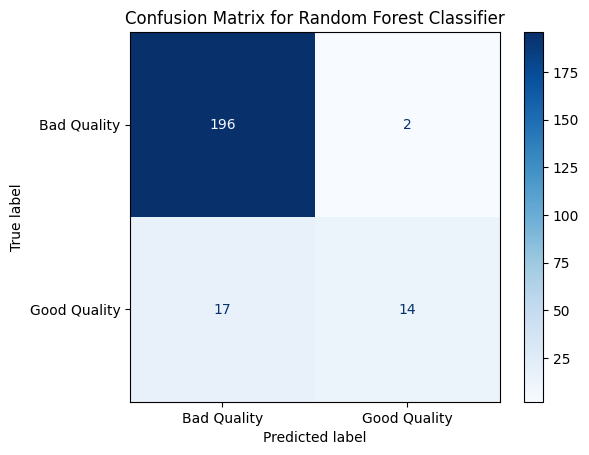

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Y_test, rf_predictions)

# Display the confusion matrix using a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Bad Quality', 'Good Quality'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()
